In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score



Moving(1) and Static(0)
Moving: Walking: A, Jogging: B, stairs: C, standing: E, kicking(Soccer Ball): M,
Playing Catch w/Tennis Ball: O, Dribbling(Basketball): P


In [2]:
input = pd.read_csv('data_1600_accel_watch.csv')
input.dtypes
input.head(10)

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,1,0.0,0.0,0.0,0.045,0.090,0.190,0.215,0.210,0.135,...,0.504662,0.498178,-0.395887,-0.105039,-0.263814,-0.035912,-0.305539,-0.292265,12.7783,b'1600'
1,1,0.0,0.0,0.0,0.000,0.030,0.250,0.305,0.225,0.125,...,0.497101,0.490714,-0.517585,-0.493655,0.208926,-0.166636,0.071774,-0.070860,12.8712,b'1600'
2,1,0.0,0.0,0.0,0.000,0.015,0.280,0.300,0.210,0.140,...,0.438027,0.432398,-0.573148,-0.468498,0.001704,-0.090878,0.005053,-0.382557,12.5949,b'1600'
3,1,0.0,0.0,0.0,0.005,0.070,0.245,0.275,0.220,0.130,...,0.447493,0.441743,-0.514097,-0.232246,-0.080241,-0.117089,0.137656,-0.265747,12.3521,b'1600'
4,1,0.0,0.0,0.0,0.000,0.015,0.260,0.325,0.230,0.110,...,0.433304,0.427736,-0.461254,0.084470,-0.418888,-0.097265,-0.118795,-0.414198,12.4168,b'1600'
5,1,0.0,0.0,0.0,0.020,0.110,0.295,0.220,0.155,0.145,...,0.513645,0.507045,-0.515503,0.254423,-0.287578,-0.091598,-0.164082,-0.152699,12.1479,b'1600'
6,1,0.0,0.0,0.0,0.010,0.065,0.260,0.285,0.205,0.115,...,0.416344,0.410994,-0.524796,-0.435362,0.113136,-0.115562,-0.103565,-0.138754,12.0715,b'1600'
7,1,0.0,0.0,0.0,0.015,0.160,0.240,0.210,0.185,0.145,...,0.482394,0.476195,-0.581123,-0.051553,-0.206350,-0.047448,-0.350743,-0.212857,11.8520,b'1600'
8,1,0.0,0.0,0.0,0.000,0.055,0.265,0.245,0.205,0.150,...,0.455328,0.449477,-0.386796,-0.360474,-0.012034,-0.038745,0.035246,-0.190623,12.7896,b'1600'
9,1,0.0,0.0,0.0,0.005,0.055,0.280,0.250,0.175,0.160,...,0.436626,0.431015,-0.581727,-0.430234,0.047552,-0.096894,-0.073358,-0.274483,12.3999,b'1600'


In [3]:
input = input.sample(frac = 1)
input.head(10)

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
56,0,0.000,0.000,0.015,0.985,0.00,0.0,0.00,0.00,0.000,...,0.443406,0.437708,-0.992213,0.999235,-0.989603,-0.616575,0.208635,-0.215926,9.79994,b'1600'
212,0,1.000,0.000,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.313039,0.309016,0.905666,-0.858338,-0.656193,-0.608446,-0.185603,0.805813,9.57135,b'1600'
176,0,0.805,0.195,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.469680,0.463645,0.922185,-0.566562,-0.461760,0.494817,0.792564,0.871491,9.58495,b'1600'
210,0,1.000,0.000,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.374168,0.369360,0.905275,-0.879935,-0.768803,-0.457464,0.286549,0.688194,9.55378,b'1600'
76,1,0.000,0.000,0.000,0.000,0.00,1.0,0.00,0.00,0.000,...,-0.101097,-0.099798,-0.990698,0.953070,-0.936131,0.169207,0.006552,0.201425,9.65884,b'1600'
59,0,0.000,0.000,0.000,1.000,0.00,0.0,0.00,0.00,0.000,...,0.439893,0.434241,-0.999665,0.999938,-0.999664,-0.091099,-0.090464,0.223157,9.78643,b'1600'
167,0,0.710,0.290,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.428467,0.422961,0.890964,-0.605268,-0.568398,0.283932,0.736353,0.743472,9.60389,b'1600'
209,0,1.000,0.000,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.359606,0.354985,0.918335,-0.893009,-0.768904,-0.612768,0.019030,0.722622,9.56127,b'1600'
300,0,0.995,0.005,0.000,0.000,0.00,0.0,0.00,0.00,0.000,...,0.644247,0.635968,0.134217,-0.574780,-0.497846,-0.661749,0.476901,-0.418269,10.78250,b'1600'
28,1,0.345,0.090,0.095,0.130,0.12,0.1,0.07,0.03,0.005,...,0.584510,0.576999,-0.144565,0.196959,0.183389,-0.038380,0.216055,0.169499,13.76540,b'1600'


In [4]:
Y = input.iloc[:,0].values
X = input.iloc[:, 1:92].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [5]:
def knn_classifier(X_train, Y_train, X_test, n_neighbors):
    classifier =  KNeighborsClassifier(n_neighbors = n_neighbors)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    return Y_pred

In [6]:
Y_train.reshape(-1,1)
Y_test.reshape(-1,1)

f1=[]

for i in range (5, 260, 5):
    X_train_stream = X_train[0:i,:]
    Y_train_stream = Y_train[0:i]
    Y_pred = knn_classifier(X_train_stream, Y_train_stream, X_test, n_neighbors=5)
    # print(f1_score(Y_test, Y_pred, average='weighted'))
    f1.append(f1_score(Y_test, Y_pred, average='weighted'))

Text(0, 0.5, 'f1 score')

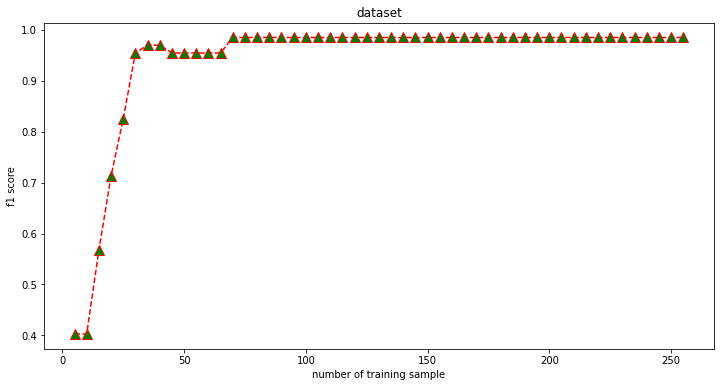

In [7]:

plt.figure(figsize=(12, 6))
plt.plot(range(5, 260, 5), f1, color='red', linestyle='dashed', marker='^',
         markerfacecolor='green', markersize=10)
plt.title('dataset')
plt.xlabel('number of training sample')
plt.ylabel('f1 score')

In [8]:
Y_pred = knn_classifier(X_train_stream, Y_train_stream, X_test, n_neighbors=5)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

[[36  1]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.98        29

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



In [9]:
# error = []
#
# # Calculating error for K values between 1 and 40
# for i in range(1, 40):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, Y_train)
#     pred_i = knn.predict(X_test)
#     error.append(np.mean(pred_i != Y_test))

In [10]:
# plt.figure(figsize=(12, 6))
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
#          markerfacecolor='blue', markersize=10)
# plt.title('Error Rate K Value')
# plt.xlabel('K Value')
# plt.ylabel('Mean Error')